# Integrals (data)


## Example:

Recall the example of evolving mixed fractions of pigments in a wind-cloud simulation.


We have three mixing fractions (one for each pigment) versus time, and we want to calculate:

1) the rate at which the pigments mix, and

2) the total amount of mixed mass of each pigment evaluated from such rate.

3) compare that to the actual amount of mixed mass at the final time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./sample-data/data_wind_cloud_mix.txt", sep = "\s+")

In [4]:
#print(df)

In [5]:
time = np.array(df["Time"])

pigment1 = np.array(df["MixedMass1"])
pigment2 = np.array(df["MixedMass2"])
pigment3 = np.array(df["MixedMass3"])

In [7]:
#print(time.shape, pigment1.shape)

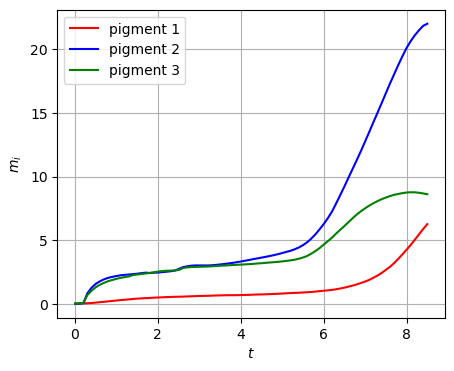

In [8]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(time, pigment1, c='red', label = "pigment 1")
ax.plot(time, pigment2, c='blue', label = "pigment 2")
ax.plot(time, pigment3, c='green', label = "pigment 3")

plt.grid()

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"$m_i$")

plt.show()

## Get rate of mixing:

In [10]:
# 2nd order derivatives
dpigment1 = np.gradient(pigment1, time[1]-time[0], axis = 0)
dpigment2 = np.gradient(pigment2, time[1]-time[0], axis = 0)
dpigment3 = np.gradient(pigment3, time[1]-time[0], axis = 0)

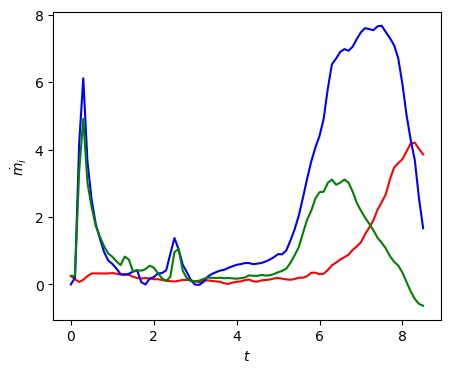

In [11]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(time, dpigment1, c='red', label = "pigment 1")
ax.plot(time, dpigment2, c='blue', label = "pigment 2")
ax.plot(time, dpigment3, c='green', label = "pigment 3")
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{m}_i$")

plt.show()

## Total mixed mass

The total mixed mass of each pigment corresponds to the last value of each array:


In [12]:
print(pigment1[-1])
print(pigment2[-1])
print(pigment3[-1])

6.259131
22.01207
8.606597


## Get integral under curves:

Another way is to integrate again, the values should be close to the ones above:

In [14]:
import scipy as sc

from scipy import integrate

### Trapezoid method:

In [15]:
sc_trapezoid1 = sc.integrate.trapz(dpigment1,time)
sc_trapezoid2 = sc.integrate.trapz(dpigment2,time)
sc_trapezoid3 = sc.integrate.trapz(dpigment3,time)

In [16]:
print(sc_trapezoid1)
print(sc_trapezoid2)
print(sc_trapezoid3)

6.272066740479672
22.05621029467118
8.623665485850836


### Simpson method:

In [17]:
sc_simpson1 = sc.integrate.simpson(dpigment1,time)
sc_simpson2 = sc.integrate.simpson(dpigment2,time)
sc_simpson3 = sc.integrate.simpson(dpigment3,time)

In [18]:
print(sc_simpson1)
print(sc_simpson2)
print(sc_simpson3)

6.2725721323044885
22.06520788457002
8.624153080110892
